# EDA Vancouver Harbour Weather 

## Problem Statement

The data comes from Historical Climate Data posted by the Government of Canada Historical Climate Data. Specifically, data we will be working with is from VANCOUVER HARBOUR, between 1970 and 2020. 

Based on the historical data about snow, rain amounts and temperature from Vancouver Harbour, predict the weather pattens and changes. 

## Import Libraries

In [11]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

## Import the Combined CSV

In [43]:
df = pd.read_csv('data/weather_data.csv')
df.head(5)

,longitude,latitude,station_name,climate_id,date_time,year,month,day,data_quality,max_temp,...,total_snow,total_snow_flag,total_percip,total_percip_flag,snow_on_ground,snow_on_ground_flag,dir_of_max_gust,dir_of_max_gust_flag,spd_of_max_gust,spd_of_max_gust_flag
0,-123.12,49.3,VANCOUVER HARBOUR CS,1108446,1982-01-01,1982,1,1,NaN,2.2,...,6.8,NaN,6.8,NaN,4.0,NaN,NaN,NaN,NaN,NaN
1,-123.12,49.3,VANCOUVER HARBOUR CS,1108446,1982-01-02,1982,1,2,NaN,1.2,...,6.0,NaN,6.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN
2,-123.12,49.3,VANCOUVER HARBOUR CS,1108446,1982-01-03,1982,1,3,NaN,0.1,...,0.0,NaN,0.0,NaN,10.0,NaN,NaN,NaN,NaN,NaN
3,-123.12,49.3,VANCOUVER HARBOUR CS,1108446,1982-01-04,1982,1,4,NaN,-1.9,...,0.0,NaN,0.0,NaN,8.0,NaN,NaN,NaN,NaN,NaN
4,-123.12,49.3,VANCOUVER HARBOUR CS,1108446,1982-01-05,1982,1,5,NaN,-4.4,...,0.0,NaN,0.0,NaN,8.0,NaN,NaN,NaN,NaN,NaN


## Initial Visualization

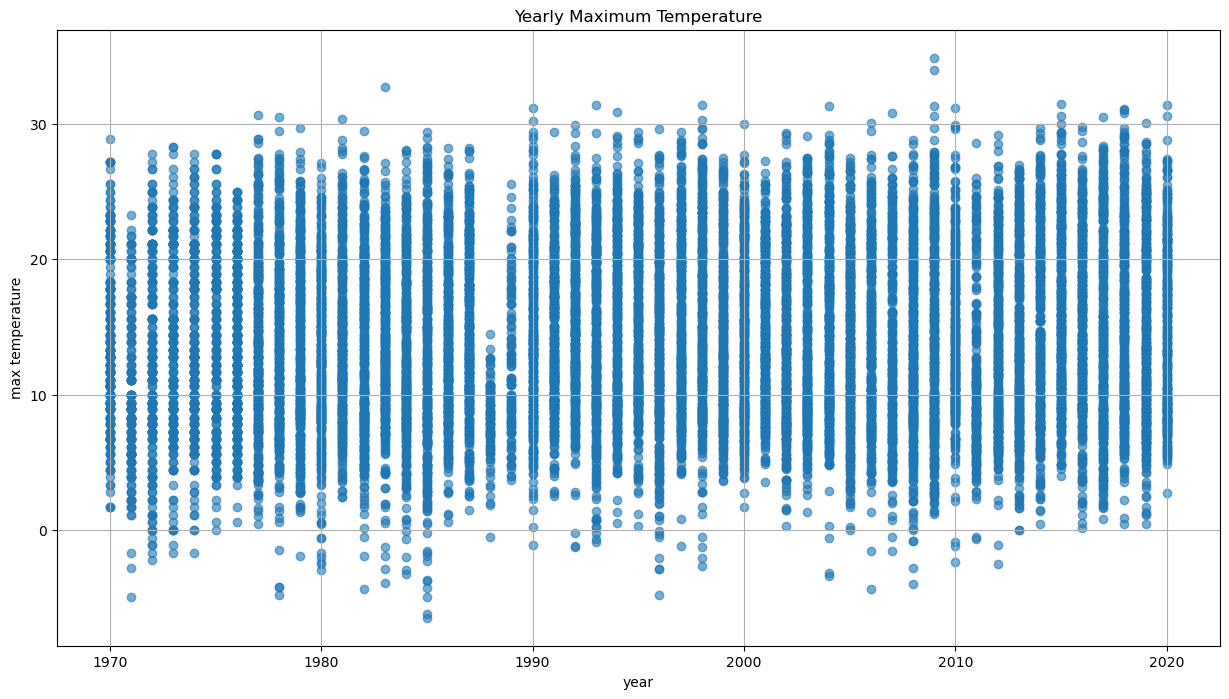

In [44]:
# Yearly Maximum Temperature
plt.figure(figsize=(15, 8)) 
plt.scatter(df["year"], df["max_temp"], alpha=0.6)
plt.title("Yearly Maximum Temperature")
plt.xlabel("year")
plt.ylabel("max temperature")
plt.grid(True)
plt.show()

The above plot shows the distribution of maximum temperatures from the years 1970 to 2020. The plot shows that data loaded sussefully. The majority of temperatures are between -5 and +30. From this graph alone we cannot yet observe any seasonal patterns. We will be exploring other graphs to detect seasonality.  

There appears to be a significant gap in the datase - there are missing values around 1985-1990. We will examine these in the next preprocessing section.

## EDA

### Missing Data

In [45]:
df.isna().sum()

longitude                   0
latitude                    0
station_name                0
climate_id                  0
date_time                   0
year                        0
month                       0
day                         0
data_quality            18628
max_temp                 1617
max_temp_flag           17850
min_temp                 1667
min_temp_flag           17680
mean_temp                1889
mean_temp_flag          17587
heat_deg_days            1889
heat_deg_days_flag      17587
cool_deg_days            1889
cool_deg_days_flag      17587
total_rain              11483
total_rain_flag         13624
total_snow              11411
total_snow_flag         14285
total_percip             1365
total_percip_flag       17314
snow_on_ground          15711
snow_on_ground_flag     18556
dir_of_max_gust         18628
dir_of_max_gust_flag    13718
spd_of_max_gust         18626
spd_of_max_gust_flag    13718
dtype: int64

### Duplicates

In [46]:
df.duplicated().sum()

0

No duplication means there are no identical records.  

### Data Types

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18628 entries, 0 to 18627
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   longitude             18628 non-null  float64
 1   latitude              18628 non-null  float64
 2   station_name          18628 non-null  object 
 3   climate_id            18628 non-null  int64  
 4   date_time             18628 non-null  object 
 5   year                  18628 non-null  int64  
 6   month                 18628 non-null  int64  
 7   day                   18628 non-null  int64  
 8   data_quality          0 non-null      float64
 9   max_temp              17011 non-null  float64
 10  max_temp_flag         778 non-null    object 
 11  min_temp              16961 non-null  float64
 12  min_temp_flag         948 non-null    object 
 13  mean_temp             16739 non-null  float64
 14  mean_temp_flag        1041 non-null   object 
 15  heat_deg_days      

Again, we see a lot of missing values across several columns. We will address them during pre-processing. The exact method will depend on the amount of missing data in these columns and importance they carry for ou dataset. 

### Statistics

In [48]:
df.describe()

,longitude,latitude,climate_id,year,month,day,data_quality,max_temp,min_temp,mean_temp,heat_deg_days,cool_deg_days,total_rain,total_snow,total_percip,snow_on_ground,dir_of_max_gust
count,1.862800e+04,1.862800e+04,18628.0,18628.000000,18628.000000,18628.000000,0.0,17011.000000,16961.000000,16739.000000,16739.000000,16739.000000,7145.000000,7217.000000,17263.000000,2917.000000,0.0
mean,-1.231200e+02,4.930000e+01,1108446.0,1995.000698,6.522869,15.729815,NaN,14.133708,7.908343,11.046777,7.179150,0.225927,3.867166,0.116045,4.249203,0.082962,NaN
std,5.867819e-11,1.529840e-11,0.0,14.720194,3.448812,8.800403,NaN,6.418499,4.983989,5.557716,5.201968,0.763948,9.065910,1.078830,8.998434,0.782596,NaN
min,-1.231200e+02,4.930000e+01,1108446.0,1970.000000,1.000000,1.000000,NaN,-6.500000,-10.600000,-7.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,-1.231200e+02,4.930000e+01,1108446.0,1982.000000,4.000000,8.000000,NaN,9.000000,4.300000,6.800000,2.300000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,-1.231200e+02,4.930000e+01,1108446.0,1995.000000,7.000000,16.000000,NaN,13.400000,7.700000,10.600000,7.400000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,-1.231200e+02,4.930000e+01,1108446.0,2008.000000,10.000000,23.000000,NaN,19.300000,12.100000,15.700000,11.200000,0.000000,3.600000,0.000000,4.600000,0.000000,NaN
max,-1.231200e+02,4.930000e+01,1108446.0,2020.000000,12.000000,31.000000,NaN,34.900000,21.100000,27.600000,25.900000,9.600000,203.200000,25.400000,203.200000,17.000000,NaN


## Preprocessing

### Addressing the Missing Values

In [49]:
# percentage of missing values per column
na_percentages = df.isna().mean() * 100

na_df = pd.DataFrame({
    "column_name": na_percentages.index,
    "na_percentage": na_percentages.values
})
print(na_df)

             column_name  na_percentage
0              longitude       0.000000
1               latitude       0.000000
2           station_name       0.000000
3             climate_id       0.000000
4              date_time       0.000000
5                   year       0.000000
6                  month       0.000000
7                    day       0.000000
8           data_quality     100.000000
9               max_temp       8.680481
10         max_temp_flag      95.823492
11              min_temp       8.948894
12         min_temp_flag      94.910887
13             mean_temp      10.140648
14        mean_temp_flag      94.411638
15         heat_deg_days      10.140648
16    heat_deg_days_flag      94.411638
17         cool_deg_days      10.140648
18    cool_deg_days_flag      94.411638
19            total_rain      61.643762
20       total_rain_flag      73.137213
21            total_snow      61.257247
22       total_snow_flag      76.685635
23          total_percip       7.327679


There are high percentages, with some columns missing entirely. In this secenario, the best course of action is to drop these columns. However, in some cases, "zeros" instead of missing values are reasonable expected. For example, total snow would be 0 in summer. We will replace these NaN values with 0. 

We also will drop rows with missing values in the target category 'max_temp_c' and correlated categories including 'min_temp_c' and 'mean_temp_c'.

In [52]:
df[["total_snow", "total_percip", "total_rain"]] = (
    df[["total_snow", "total_percip", "total_rain"]].fillna(0)
)

In [53]:
# drop rows where any of the selected columns are missing
df = df.dropna(subset=["max_temp", "min_temp", "mean_temp"])

# Verify
print(df.shape)
df.head()

(16739, 31)


,longitude,latitude,station_name,climate_id,date_time,year,month,day,data_quality,max_temp,...,total_snow,total_snow_flag,total_percip,total_percip_flag,snow_on_ground,snow_on_ground_flag,dir_of_max_gust,dir_of_max_gust_flag,spd_of_max_gust,spd_of_max_gust_flag
0,-123.12,49.3,VANCOUVER HARBOUR CS,1108446,1982-01-01,1982,1,1,NaN,2.2,...,6.8,NaN,6.8,NaN,4.0,NaN,NaN,NaN,NaN,NaN
1,-123.12,49.3,VANCOUVER HARBOUR CS,1108446,1982-01-02,1982,1,2,NaN,1.2,...,6.0,NaN,6.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN
2,-123.12,49.3,VANCOUVER HARBOUR CS,1108446,1982-01-03,1982,1,3,NaN,0.1,...,0.0,NaN,0.0,NaN,10.0,NaN,NaN,NaN,NaN,NaN
3,-123.12,49.3,VANCOUVER HARBOUR CS,1108446,1982-01-04,1982,1,4,NaN,-1.9,...,0.0,NaN,0.0,NaN,8.0,NaN,NaN,NaN,NaN,NaN
4,-123.12,49.3,VANCOUVER HARBOUR CS,1108446,1982-01-05,1982,1,5,NaN,-4.4,...,0.0,NaN,0.0,NaN,8.0,NaN,NaN,NaN,NaN,NaN


In [54]:
# keep only columns with no missing values
df = df.loc[:, df.notna().all()]

# check which columns remain
print(df.columns)

Index(['longitude', 'latitude', 'station_name', 'climate_id', 'date_time',
       'year', 'month', 'day', 'max_temp', 'min_temp', 'mean_temp',
       'heat_deg_days', 'cool_deg_days', 'total_rain', 'total_snow',
       'total_percip'],
      dtype='object')


In [55]:
na_columns = df.columns[~df.notna().all()]
print("Dropped columns with missing values:", na_columns.tolist())

Dropped columns with missing values: []


### Examening Seasonality

Now, with the "clean" dataset, we can go ahead and plot some seasonal changes across various metrics (snow, rain, wind, etc.). 

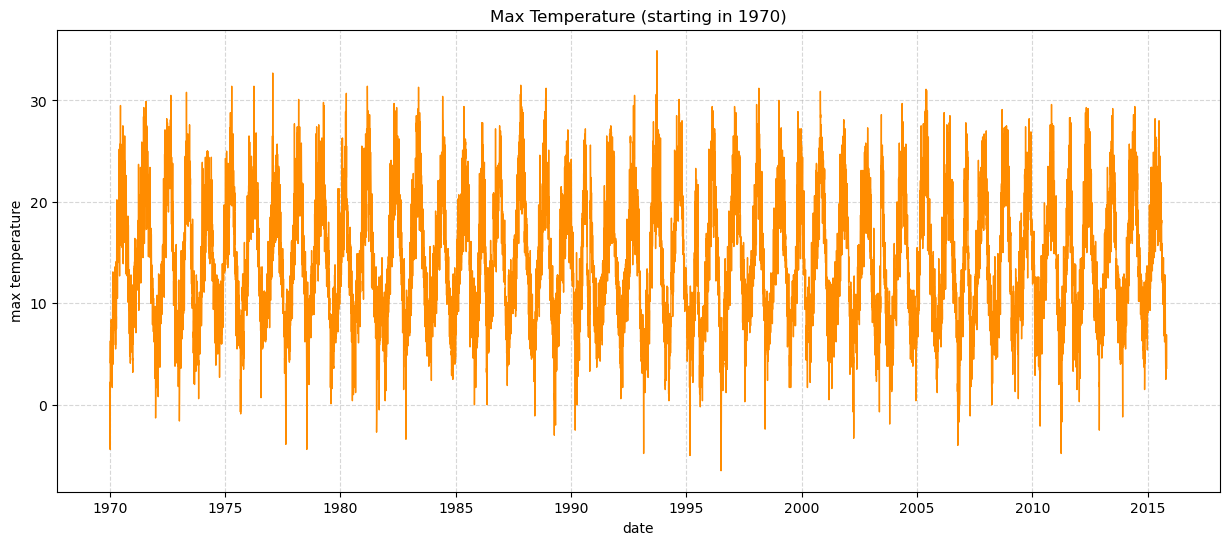

In [30]:
# max temperature in the last 50 years
max_temp = df["max_temp"]

start_year = 1970
time_index = pd.date_range(start=f"{start_year}-01-01", periods=len(max_temp), freq="D")

ts_data = pd.Series(max_temp.values, index=time_index)

# Plot
plt.figure(figsize=(15, 6))
plt.plot(ts_data, color="darkorange", linewidth=1)
plt.title("Max Temperature (starting in 1970)")
plt.xlabel("date")
plt.ylabel("max temperature")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

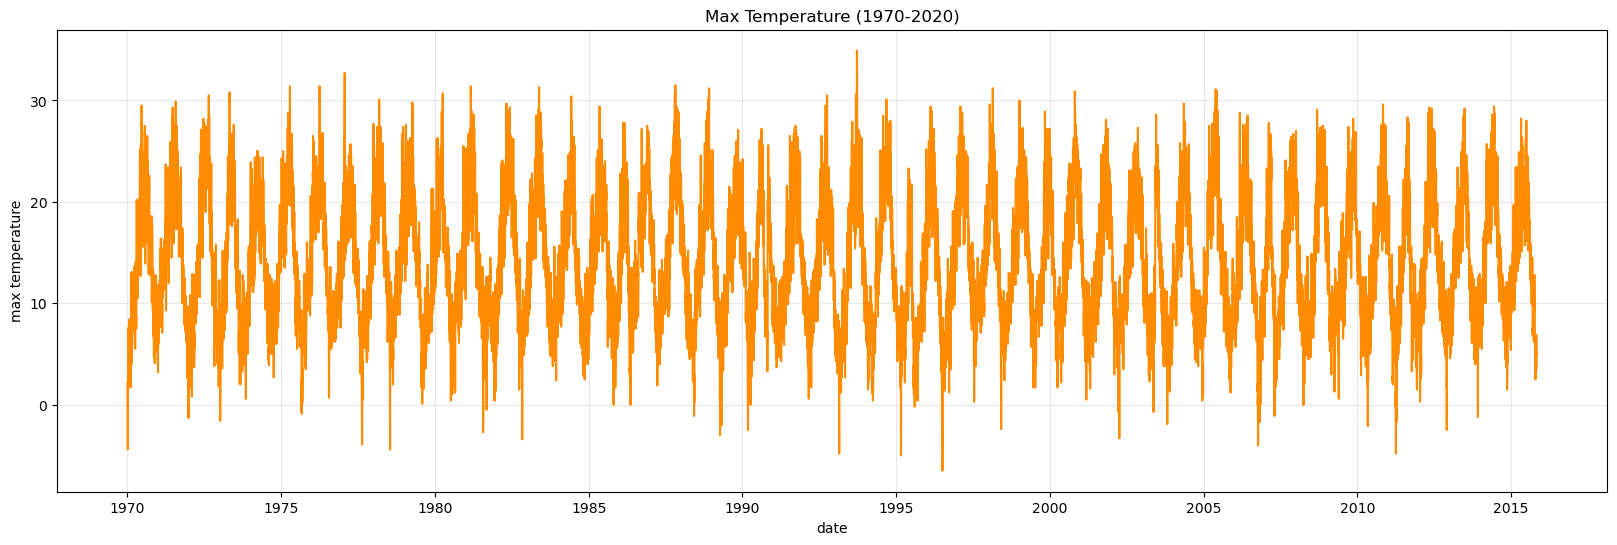

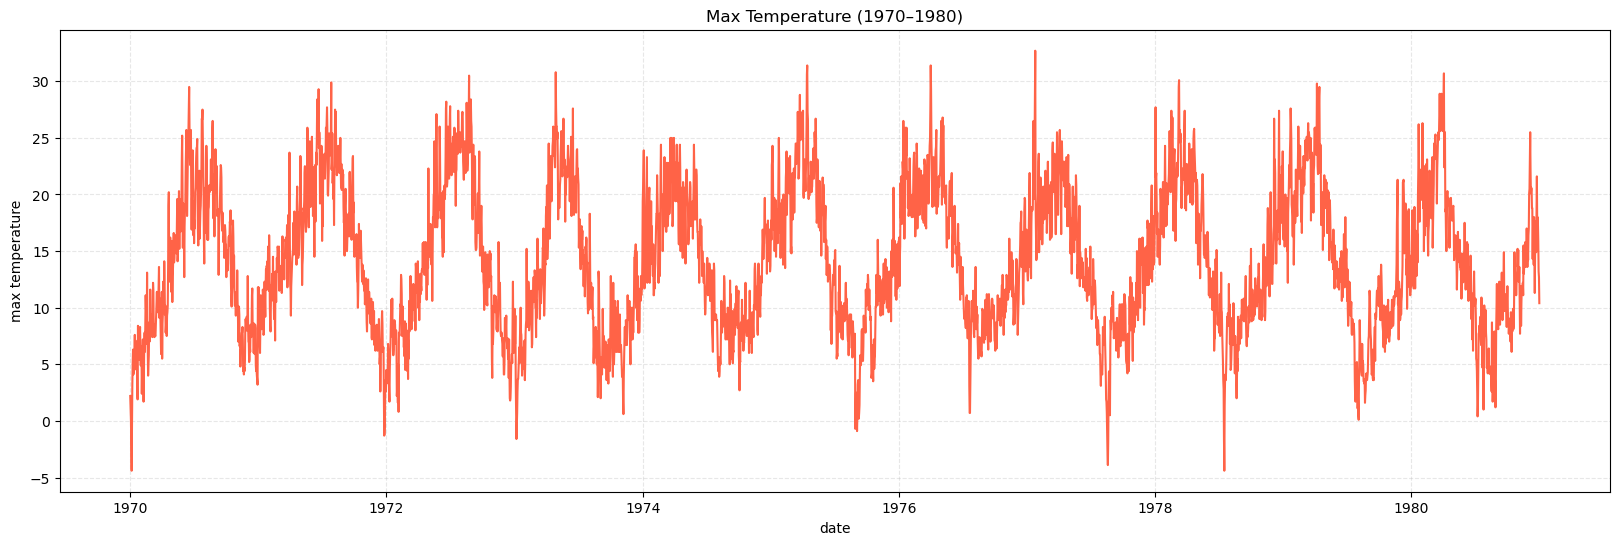

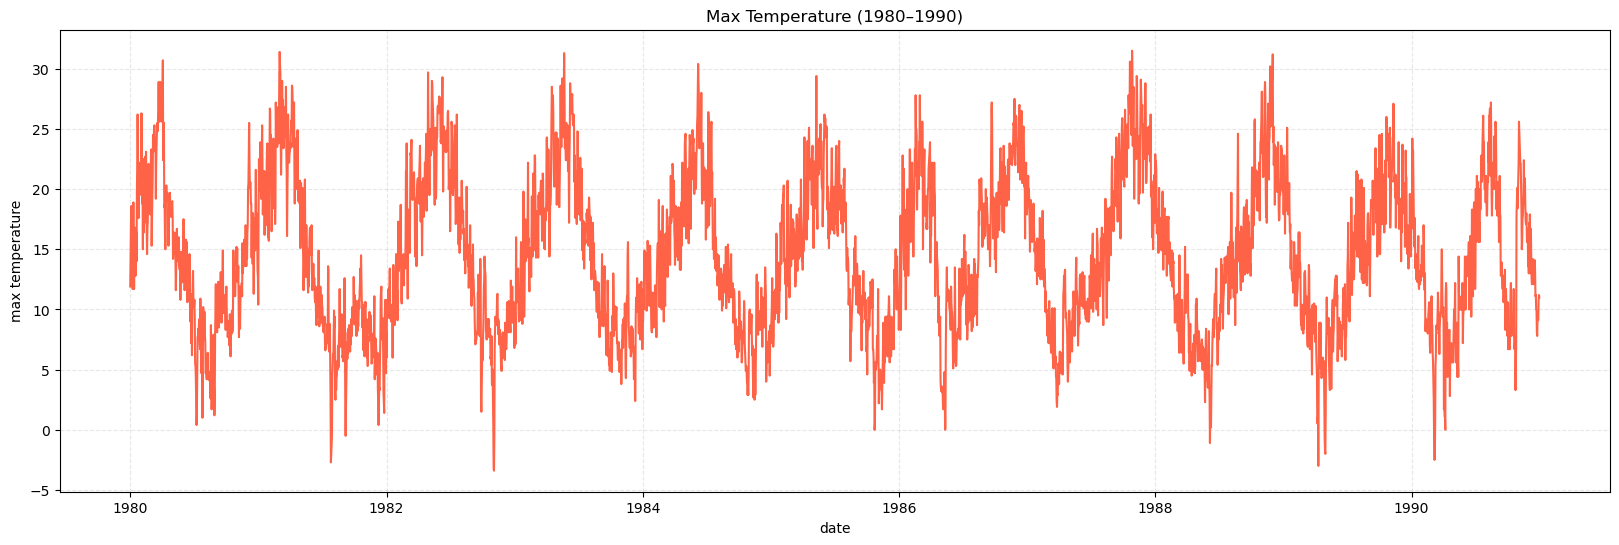

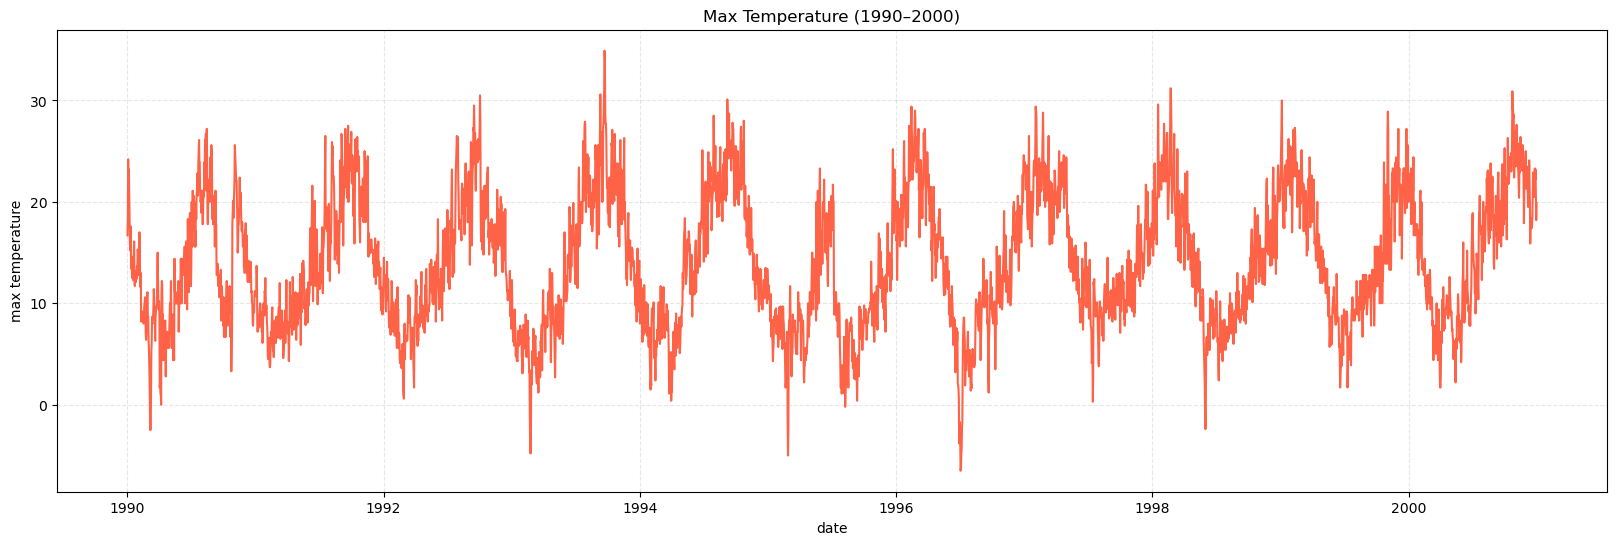

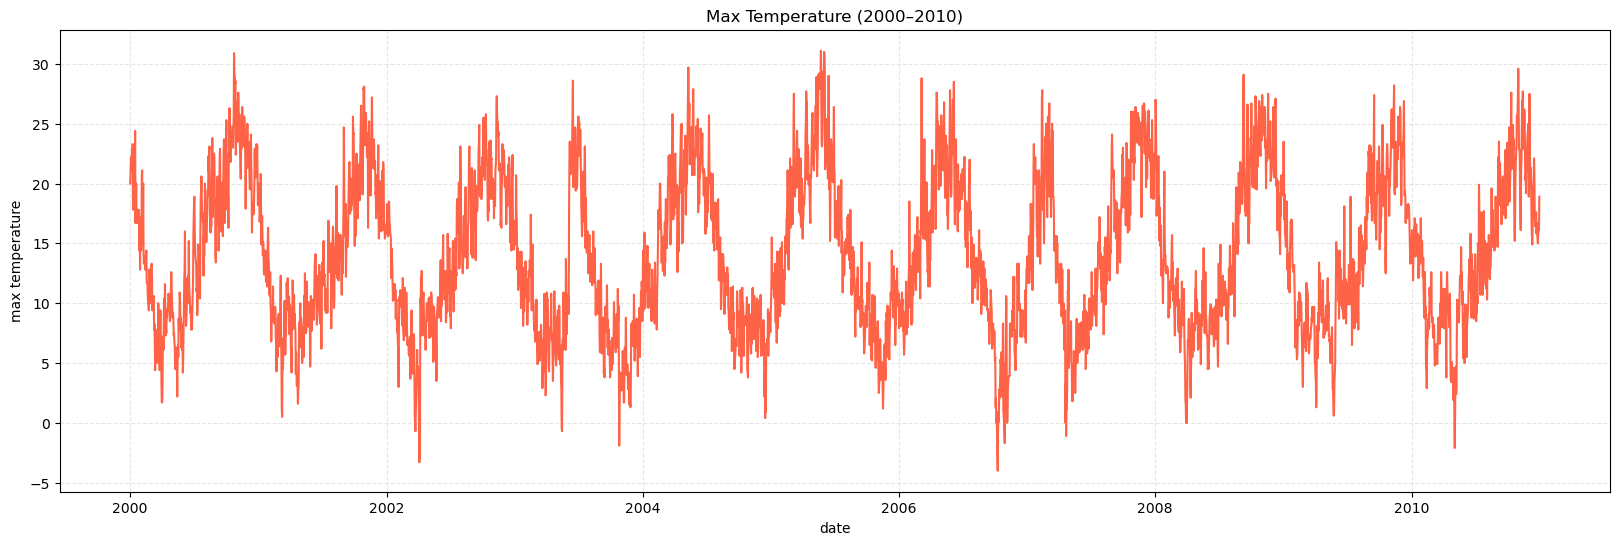

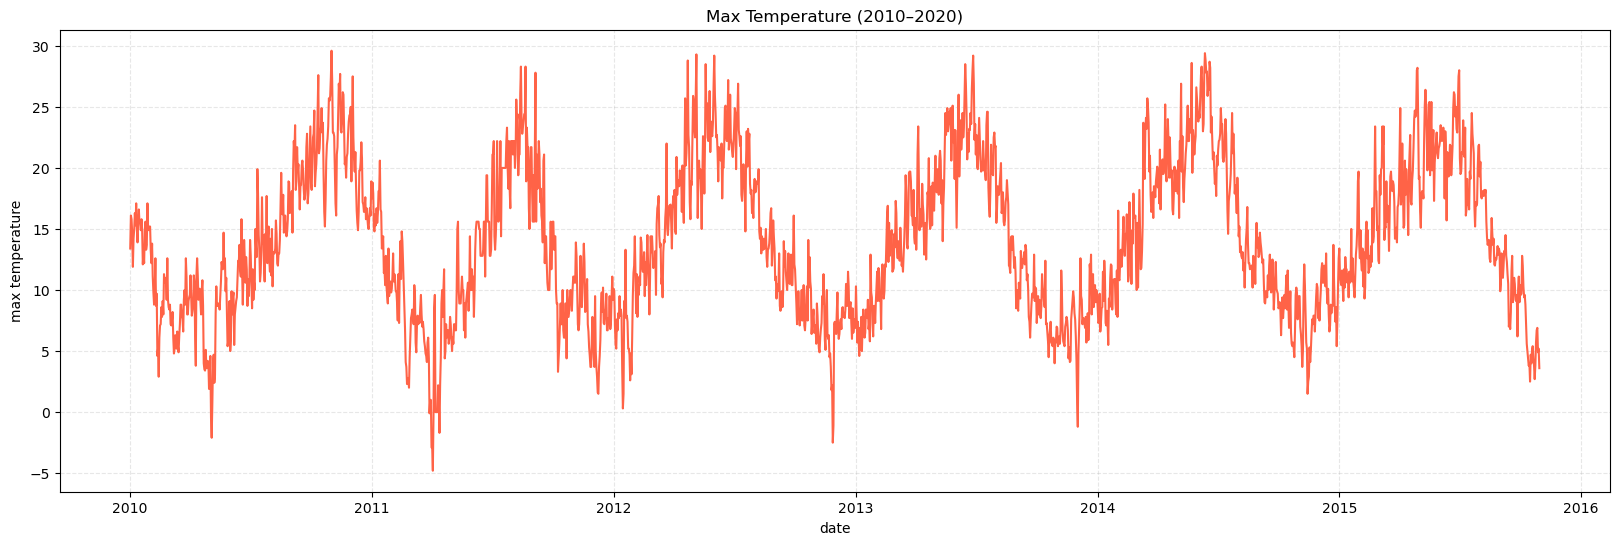

In [32]:
start_year = 1970
time_index = pd.date_range(start=f"{start_year}-01-01", periods=len(max_temp), freq="D")
ts_data = pd.Series(max_temp.values, index=time_index)

plt.figure(figsize=(20, 6))
plt.plot(ts_data, color="darkorange")
plt.title("Max Temperature (1970-2020)")
plt.xlabel("date")
plt.ylabel("max temperature")
plt.grid(True, linestyle="-", alpha=0.3)
plt.show()

# function for subset plotting
def plot_subset(data, start, end):
    subset = data.loc[str(start):str(end)]
    plt.figure(figsize=(20, 6))
    plt.plot(subset, color="tomato")
    plt.title(f"Max Temperature ({start}–{end})")
    plt.xlabel("date")
    plt.ylabel("max temperature")
    plt.grid(True, linestyle="--", alpha=0.3)
    plt.show()

# loop through decades
for start in range(1970, 2020, 10):
    plot_subset(ts_data, start, start + 10)


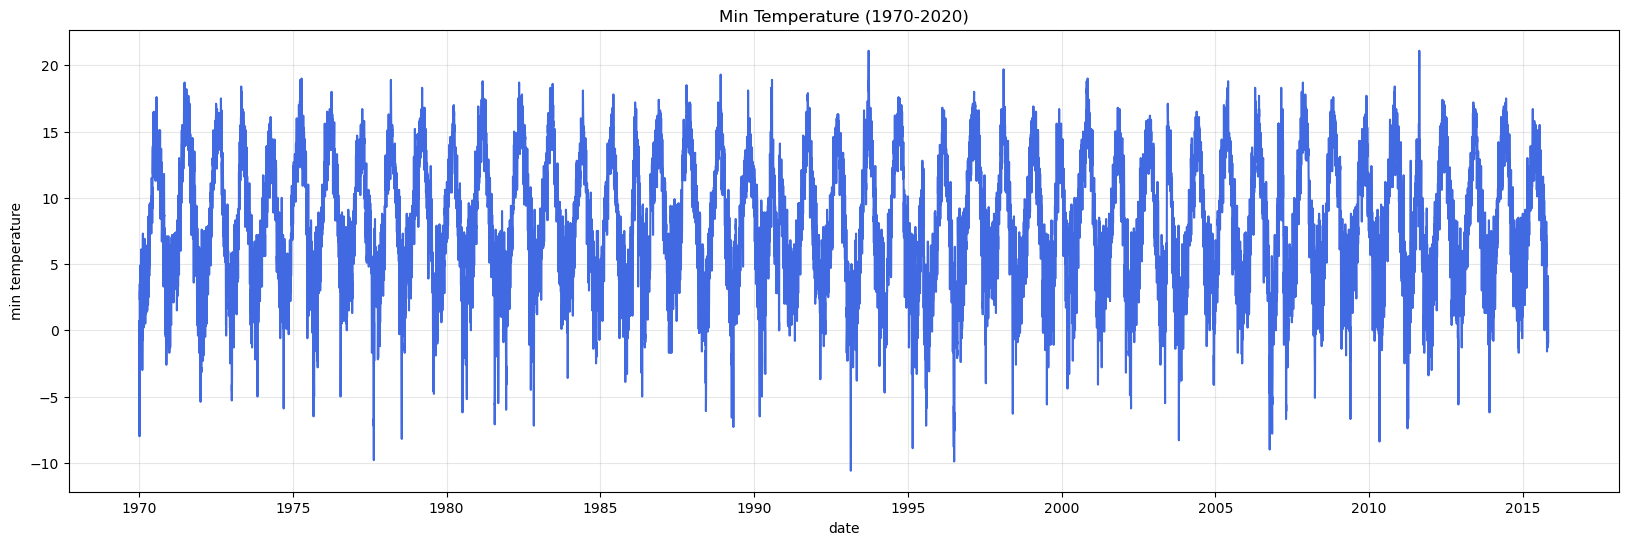

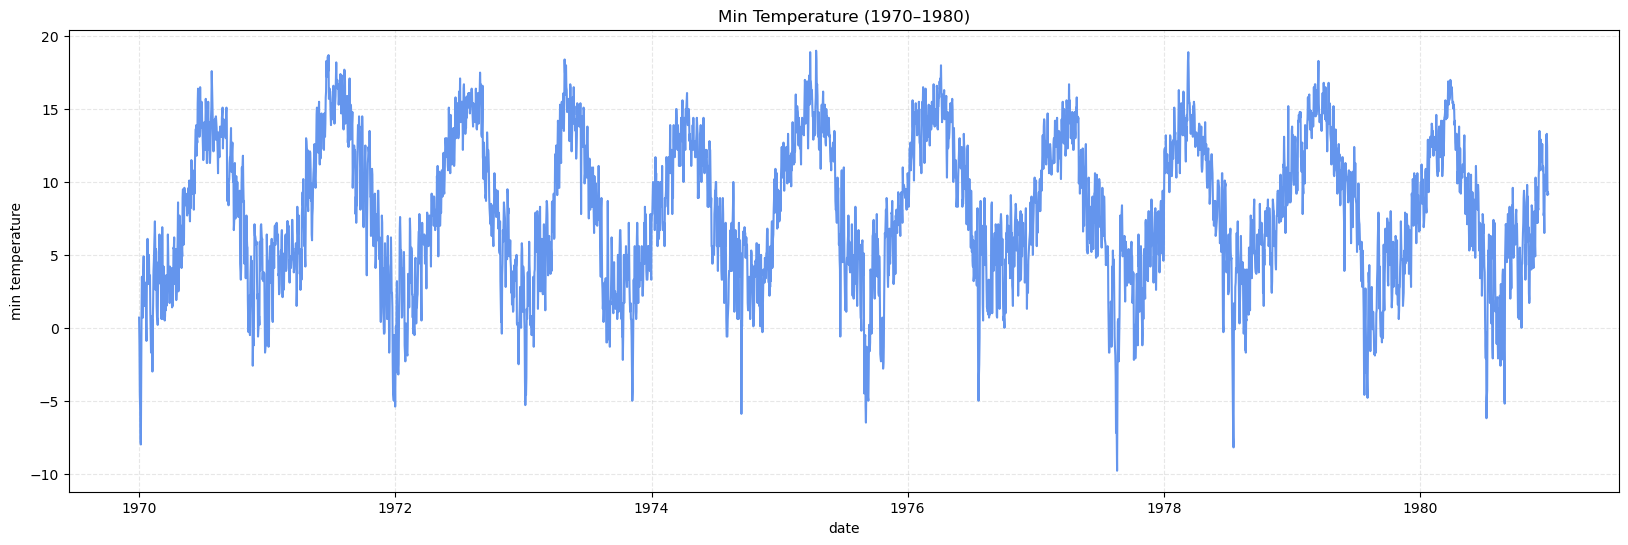

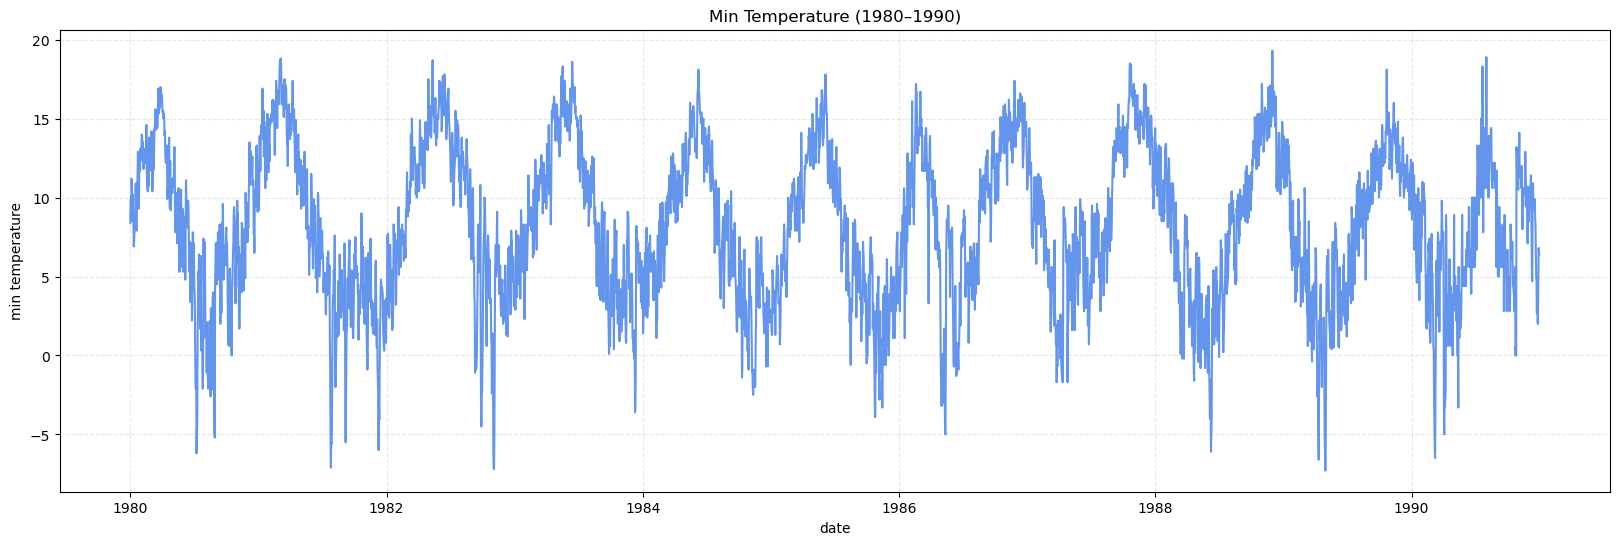

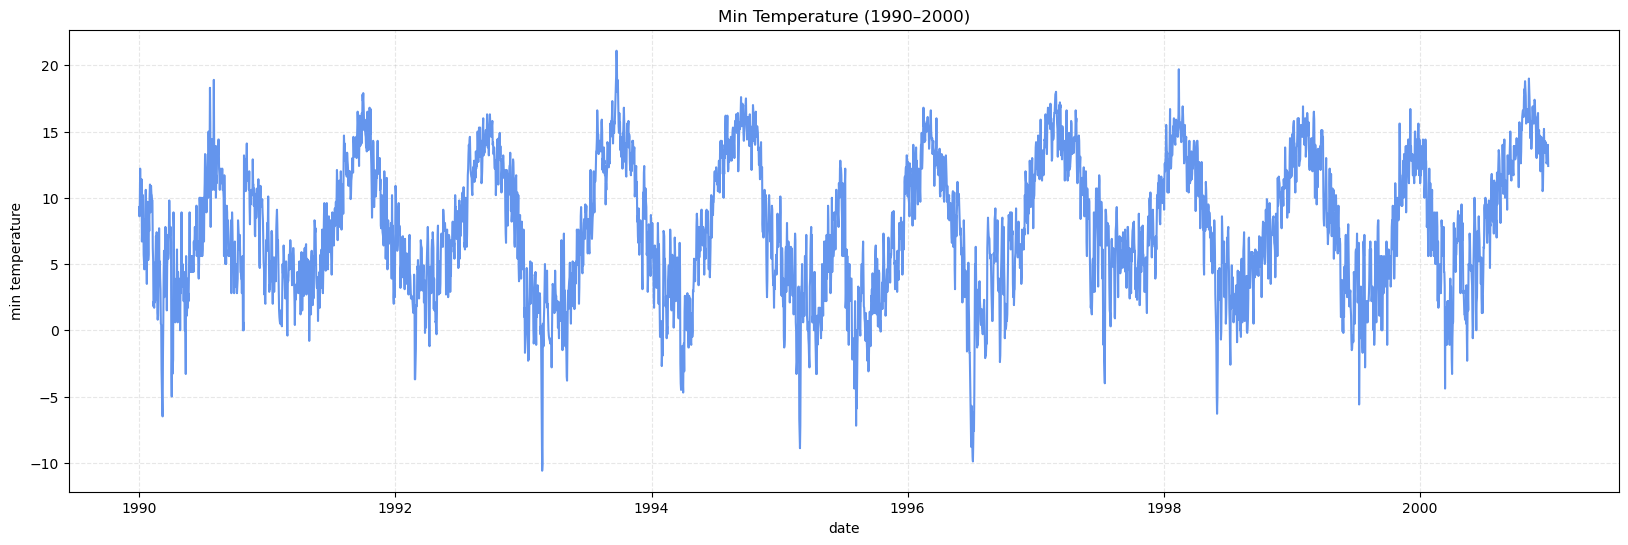

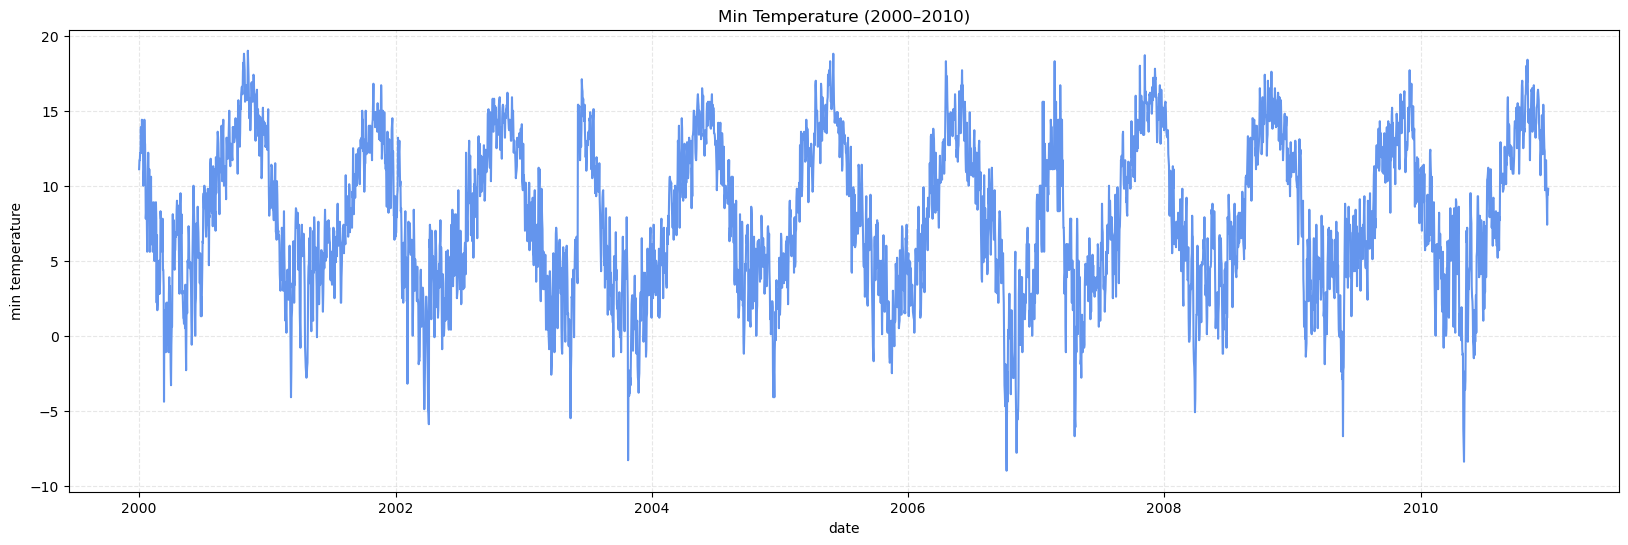

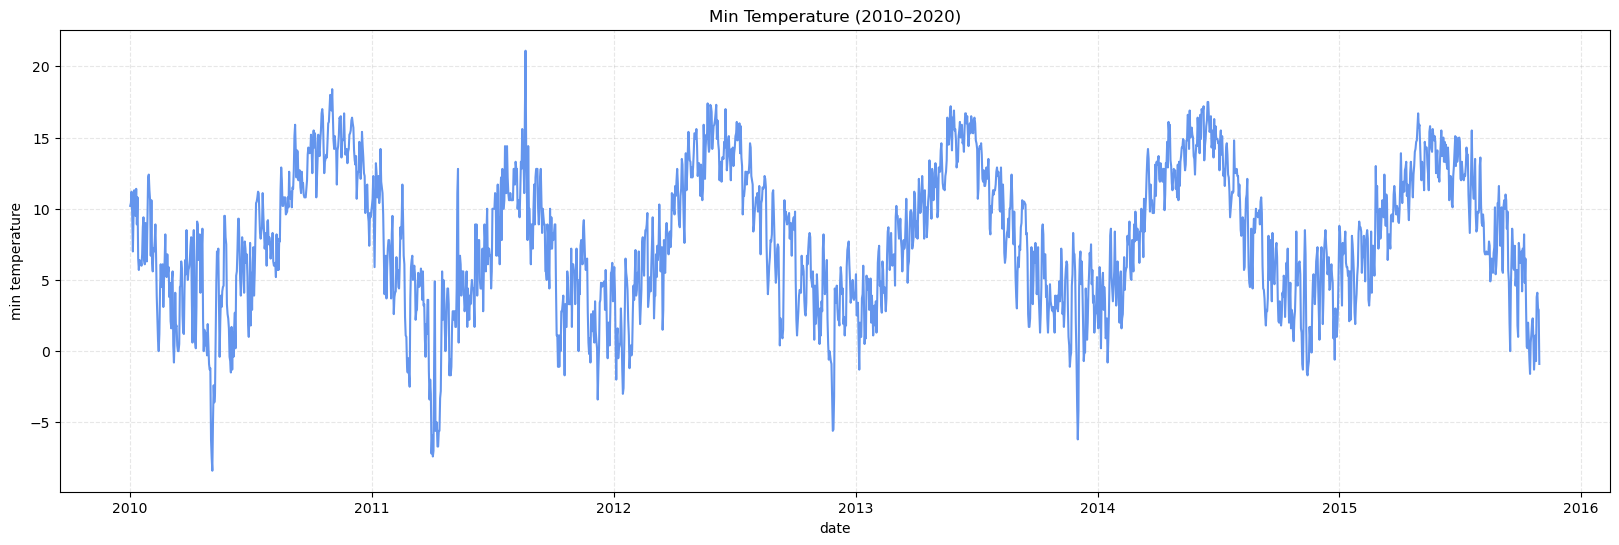

In [33]:
min_temp = df["min_temp"]

start_year = 1970
time_index = pd.date_range(start=f"{start_year}-01-01", periods=len(min_temp), freq="D")
ts_data = pd.Series(min_temp.values, index=time_index)

plt.figure(figsize=(20, 6))
plt.plot(ts_data, color="royalblue")
plt.title("Min Temperature (1970-2020)")
plt.xlabel("date")
plt.ylabel("min temperature")
plt.grid(True, linestyle="-", alpha=0.3)
plt.show()

# function for subset plotting
def plot_subset(data, start, end):
    subset = data.loc[str(start):str(end)]
    plt.figure(figsize=(20, 6))
    plt.plot(subset, color="cornflowerblue")
    plt.title(f"Min Temperature ({start}–{end})")
    plt.xlabel("date")
    plt.ylabel("min temperature")
    plt.grid(True, linestyle="--", alpha=0.3)
    plt.show()

# loop through decades
for start in range(1970, 2020, 10):
    plot_subset(ts_data, start, start + 10)

   day_of_year  mean_max_temperature  mean_min_temperature
0            1              6.383333              2.288095
1            2              6.020455              1.906818
2            3              6.026087              1.689130
3            4              6.206667              1.877778
4            5              6.110870              1.686957


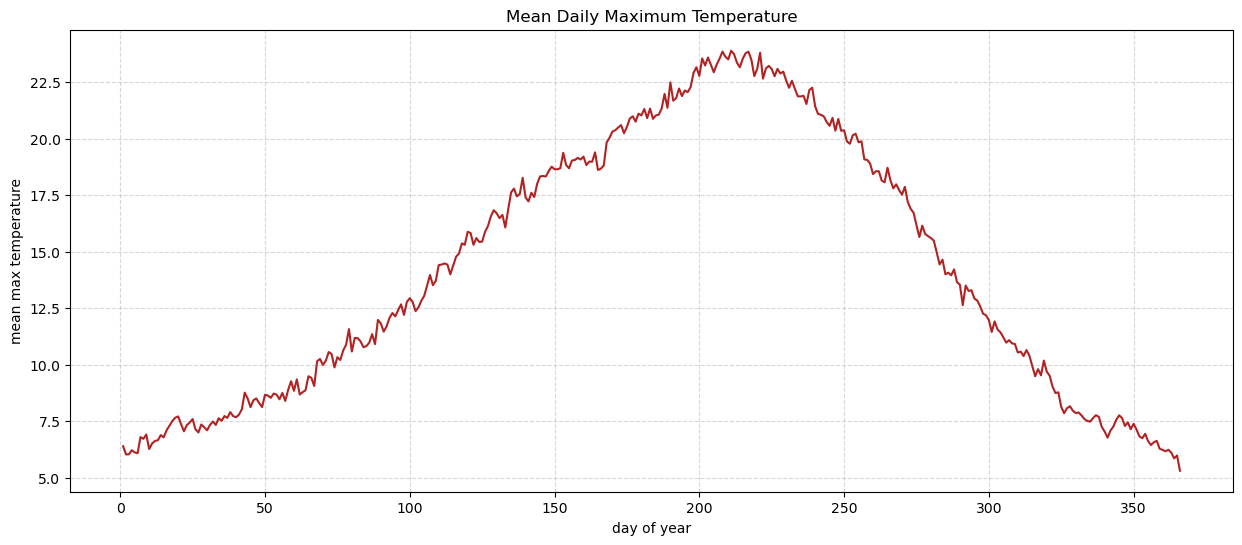

In [40]:
# convert to datetime
df["date_time"] = pd.to_datetime(df["date_time"])
                                 
# create a 'day_of_year' column (1–366)
df["day_of_year"] = df["date_time"].dt.dayofyear

# group by day of year and compute mean temps
daily_summary = (
    df.groupby("day_of_year", as_index=False)
    .agg(mean_max_temperature=("max_temp", "mean"),
         mean_min_temperature=("min_temp", "mean"))
)

# display first few rows
print(daily_summary.head())

# plot the mean max temperature
plt.figure(figsize=(15, 6))
plt.plot(
    daily_summary["day_of_year"],
    daily_summary["mean_max_temperature"],
    color="firebrick",
    linewidth=1.5,
)
plt.title("Mean Daily Maximum Temperature")
plt.xlabel("day of year")
plt.ylabel("mean max temperature")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


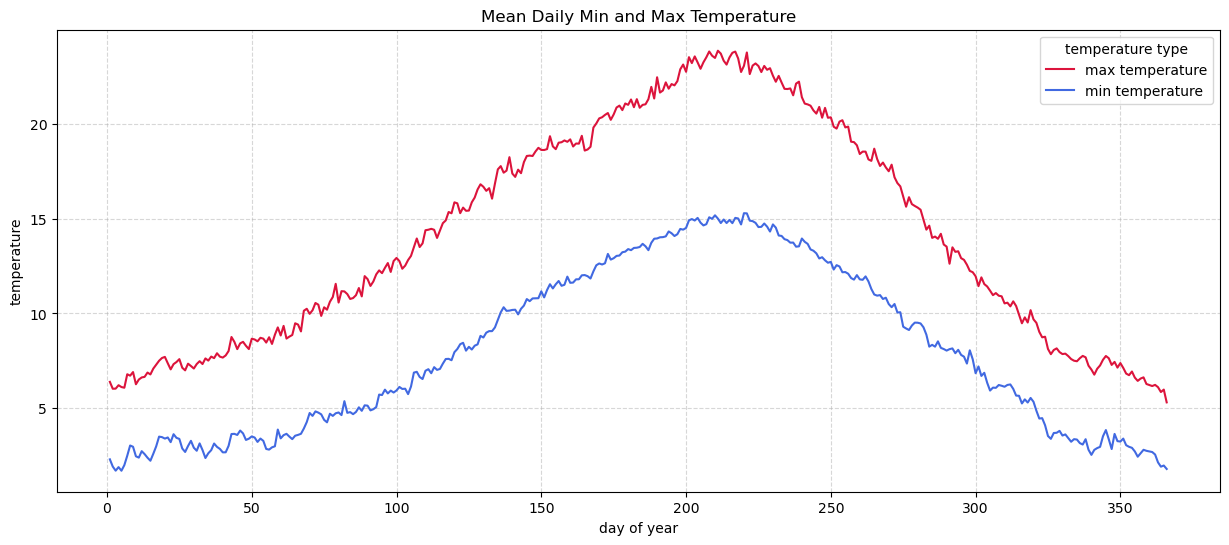

In [41]:
plt.figure(figsize=(15, 6))
plt.plot(
    daily_summary["day_of_year"],
    daily_summary["mean_max_temperature"],
    color="crimson",
    label="max temperature",
)
plt.plot(
    daily_summary["day_of_year"],
    daily_summary["mean_min_temperature"],
    color="royalblue",
    label="min temperature",
)

plt.title("Mean Daily Min and Max Temperature")
plt.xlabel("day of year")
plt.ylabel("temperature")
plt.legend(title="temperature type")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

### Snow and Rain Across time

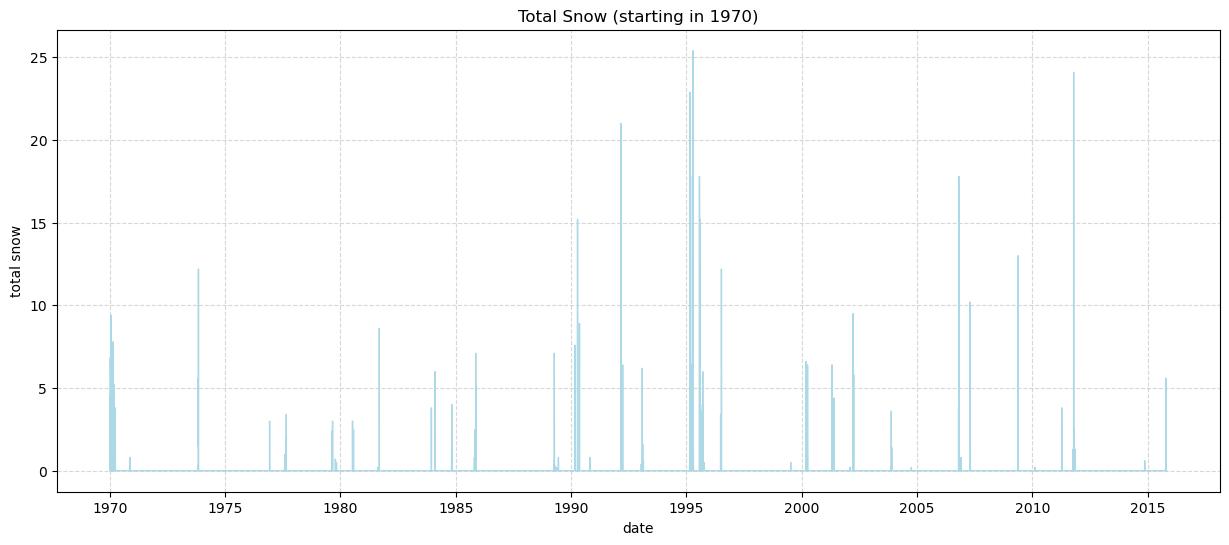

In [56]:
# max temperature in the last 50 years
total_snow = df["total_snow"]

start_year = 1970
time_index = pd.date_range(start=f"{start_year}-01-01", periods=len(total_snow), freq="D")

ts_data = pd.Series(total_snow .values, index=time_index)

# Plot
plt.figure(figsize=(15, 6))
plt.plot(ts_data, color="lightblue", linewidth=1)
plt.title("Total Snow (starting in 1970)")
plt.xlabel("date")
plt.ylabel("total snow")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

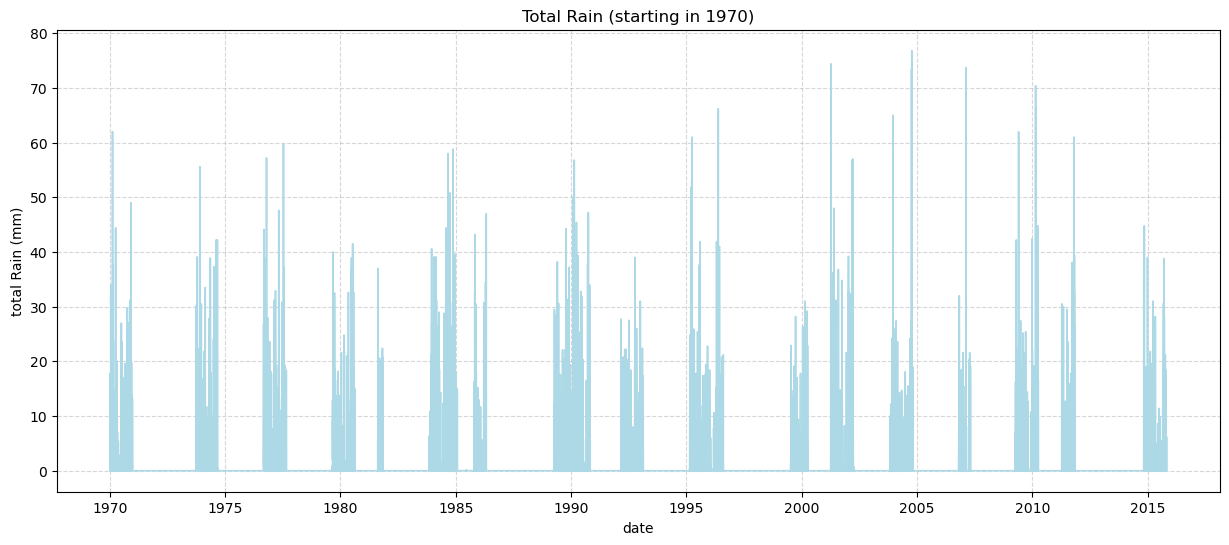

In [58]:
# total rain in the last 50 years
total_rain = df["total_rain"]

start_year = 1970
time_index = pd.date_range(start=f"{start_year}-01-01", periods=len(total_rain), freq="D")

ts_data = pd.Series(total_rain.values, index=time_index)

# Plot
plt.figure(figsize=(15, 6))
plt.plot(ts_data, color="lightblue", linewidth=1.2)
plt.title("Total Rain (starting in 1970)")
plt.xlabel("date")
plt.ylabel("total Rain (mm)")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


### Save cleaned data

In [60]:
df.to_csv("/Users/dianarogachova/Desktop/assignment_4/notebooks/data/weather_data_cleaned.csv", index=False)